For some columns in your dataframe, you may want to change the values in them if they follow some pattern.

In this case, for example you try to decect in there is any value contain `6` in the `BMI` column; if so, then replace the whole value as `0`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data_path = 'https://raw.githubusercontent.com/DrJieTao/ba545-docs/master/data/diabetes.csv'
df = pd.read_csv(data_path)
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#starting with one column
my_col = df.BMI
my_col.head()  # BMI in pandas is detected a float data type or continuous 

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [6]:
# set the dtype of column as string
# if the column.dtype is already string then do NOT do this!!!
my_col = my_col.astype('str') # change float to string 
# check the value in column contains '6', if so then replace the whole value as '0'
my_col[my_col.str.contains("6")] = '0'
# You should change the dtype back to 'float' or 'int' to match the original data
# if the original dtype is object then do NOT do this!!!
my_col = my_col.astype('float')
# look at the first 5 values to see if they are changed
my_col.head()

0     0.0
1     0.0
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

(array([156.,   0.,   0.,  62., 148., 238., 105.,  45.,  11.,   3.]),
 array([ 0.  ,  5.94, 11.88, 17.82, 23.76, 29.7 , 35.64, 41.58, 47.52,
        53.46, 59.4 ]),
 <BarContainer object of 10 artists>)

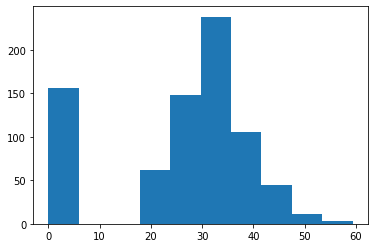

In [7]:
plt.hist(my_col) # shows BMI has some outliers less than 10 in value

In [8]:
my_col.value_counts() # we have missing values for 0.0, 156 in total count that need to be replaced 

0.0     156
32.0     13
31.2     12
32.4     10
33.3     10
       ... 
19.1      1
31.1      1
48.3      1
20.0      1
49.3      1
Name: BMI, Length: 199, dtype: int64

In [9]:
# Let's practice replacing the zeros with the median of the column 
my_col_replaced = my_col.replace(0.0, my_col.median())


In [10]:
# test the missing values were filled with median 
np.where(my_col_replaced == 0.0 , 1, 0).sum() # confirmed a total missing is zero for the feature BMI 

0

In [11]:
# make a copy of my_col to practice filling in the missing value of 0 again with fillna 
my_col_zerotoNaN = my_col.copy()
my_col_zerotoNaN.head()  # shows the missing values of zero again for BMI

0     0.0
1     0.0
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [12]:
# with fillna method, first replace 0.0 with np.NaN
my_col_zerotoNaN = my_col.replace(0.0, np.NaN)
my_col_zerotoNaN.head() # check the 0.0s changed to NaNs

0     NaN
1     NaN
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [14]:
# Use fillna method to replace NaNs with median 
my_col_NaNtoMed = my_col_zerotoNaN.fillna(my_col_zerotoNaN.median())
my_col_NaNtoMed.head()

0    32.25
1    32.25
2    23.30
3    28.10
4    43.10
Name: BMI, dtype: float64